---
title: "人工智能 - 逻辑回归基础"
date: 2025-05-05T21:40:32+08:00
author: "Liu Zheng"
tags: ["笔记", "实验"]
categories: "实验笔记"
---

## 逻辑回归基础

### 1.基础环境配置

In [5]:
import numpy
import matplotlib.pyplot
import matplotlib.patches
import pandas

matplotlib.pyplot.style.use("matplotlib.mplstyle")

### 2.Sigmoid 函数和 Logistic 函数

广义上，Sigmoid 函数是指任何呈“S”形的函数。Logistic 函数是其中最常见的一种：

**定义**：Logistic 函数是一种特殊的 Sigmoid 函数，其标准形式：$ g(x) = \frac{1}{1 + e^{-x}} $

**特性**：将任意实数输入映射到 (0, 1) 区间内的值, 呈 S 形曲线，中心对称。

**应用**：在统计学中，常用于逻辑回归模型，用于预测二元分类问题。逻辑回归是Logistic 函数的主要应用。用于估计某个事件发生的概率，例如判断一封邮件是否为垃圾邮件、预测患者是否患有某种疾病等。

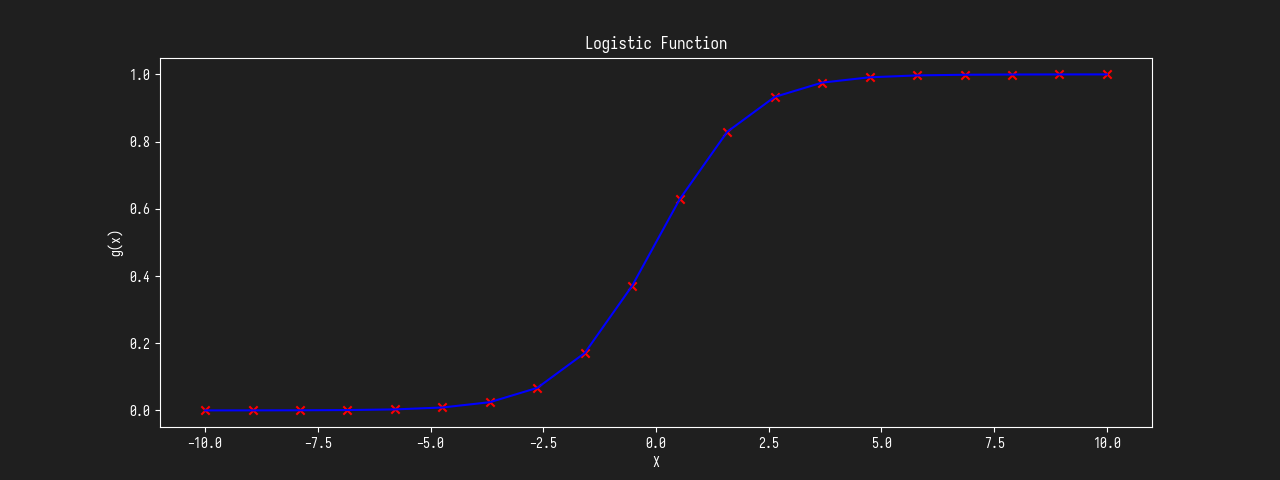

In [6]:
X = numpy.linspace(-10, 10, 20)
G = 1 / (1 + numpy.exp(-X))

matplotlib.pyplot.scatter(X, G, marker="x", c="r")
matplotlib.pyplot.plot(X, G, color="blue", label=f"g(x) = 1 / (1 + e^(-x))")
matplotlib.pyplot.title("Logistic Function")
matplotlib.pyplot.ylabel("g(x)")
matplotlib.pyplot.xlabel("X")
matplotlib.pyplot.show()

### 3.逻辑回归函数

结合一元线性回归公式：$ z=\vec{w}\cdot{\vec{x}}+b,f_{\vec{w},b}(\vec{x})=g(z)=\frac{1}{1 + e^{-z}}=>f_{\vec{w},b}(\vec{x})=\frac{1}{1 + e^{-(\vec{w}\cdot{\vec{x}}+b)}} $

从概率论的角度来说，$f_{\vec{w},b}(\vec{x})$计算的是散列值为1的概率，我们可以记作如下公式：$ f_{\vec{w},b}(\vec{x})=P(1|\vec{x};\vec{w},b) $

同时，根据概率公式，我们也可以得到：$ P(1|\vec{x};\vec{w},b) + P(0|\vec{x};\vec{w},b) = 1 $

### 4.逻辑回归中的决策边界

在逻辑回归中，决策边界（Decision Boundary）是用于划分不同类别的数据点的边界。以下是关于逻辑回归中决策边界的详细解释：

> **决策边界的定义**
> 
> * 在分类问题中，决策边界是一个超平面或超曲面，它将特征空间划分为不同的区域，每个区域对应一个类别。
> * 在逻辑回归中，决策边界是由模型学习到的参数决定的。
> 
> **逻辑回归与决策边界**
> 
> * 逻辑回归通过 sigmoid 函数（或 logistic 函数）将线性组合的特征转换为概率值，该概率值表示样本属于某一类别的可能性。
> * 通常情况下，我们会设定一个阈值（例如 0.5），当概率值大于该阈值时，将样本分类为某一类别；否则，分类为另一类别。
> * 决策边界就是使得概率值等于该阈值的点所构成的集合。
> 
> **线性决策边界**
> 
> * 如果特征之间的关系是线性的，那么逻辑回归产生的决策边界就是一条直线（二维特征空间）或一个超平面（高维特征空间）。
> * 这意味着，可以使用线性方程来描述决策边界。
> 
> **非线性决策边界**
> 
> * 如果特征之间的关系是非线性的，逻辑回归可以通过引入多项式特征或使用其他技术（如核技巧）来学习非线性决策边界。
> * 在这种情况下，决策边界可能是一条曲线或一个复杂的曲面。
> 
> **决策边界的作用**
> 
> * 决策边界能够帮助我们理解逻辑回归模型的分类规则。
> * 通过可视化决策边界，我们可以直观地了解模型如何划分不同类别的数据点。
> 
> **总结**
> 
> * 逻辑回归中的决策边界是模型用于分类数据点的分界线。
> * 它可以是线性的或非线性的，取决于特征之间的关系以及模型所使用的技术。
> * 决策边界的可视化，可以方便人们更直观的理解模型的分类效果。

下方示例为一元线性边界示例，引用决策边界函数：$ z=\vec{w}\cdot{\vec{x}}+b=0,w_1=1,w_2=1,b=-8=>x_1+x_2-8=0 $

另一示例为非线性决策边界，此处引用决策边界函数：$ z=\vec{w}\cdot{\vec{x}\cdot{\vec{x}}}+b=0,w_1=1,w_2=1,b=-9=>x_1^2+x_2^2-81=0 $

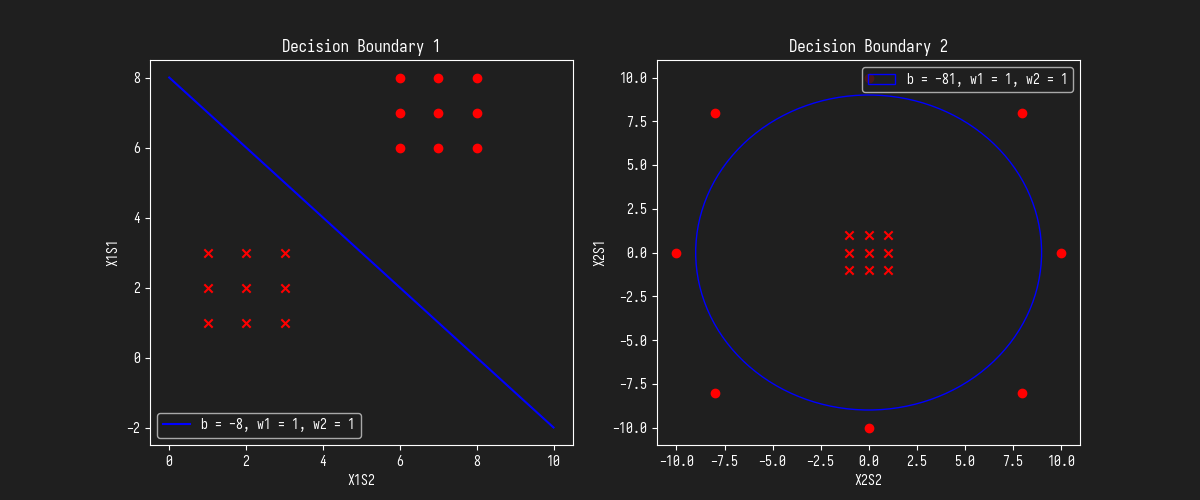

In [7]:
X1S1 = numpy.linspace(0, 10, 40)
X1S2 = numpy.linspace(0, 10, 40)

P1D0 = numpy.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
P1D1 = numpy.array([[6,6],[6,7],[6,8],[7,6],[7,7],[7,8],[8,6],[8,7],[8,8]])

X2S1 = numpy.linspace(-10, 10, 40)
X2S2 = numpy.linspace(-10, 10, 40)

P2D0 = numpy.array([[0,0],[-1,0],[1,0],[0,-1],[-1,-1],[1,-1],[0,1],[-1,1],[1,1]])
P2D1 = numpy.array([[0,10],[0,-10],[10,0],[-10,0],[8,8],[8,-8],[-8,8],[-8,-8]])

figure, (axes1, axes2) = matplotlib.pyplot.subplots(1, 2, figsize=(12, 5))

axes1.scatter(P1D0[:,0], P1D0[:,1], marker="x", c="r")
axes1.scatter(P1D1[:,0], P1D1[:,1], marker="o", c="r")
axes1.plot(X1S1, 8 - X1S2, color="blue", label=f"b = -8, w1 = 1, w2 = 1")
axes1.set_title("Decision Boundary 1")
axes1.legend()
axes1.set_ylabel("X1S1")
axes1.set_xlabel("X1S2")

axes2.scatter(P2D0[:,0], P2D0[:,1], marker="x", c="r")
axes2.scatter(P2D1[:,0], P2D1[:,1], marker="o", c="r")
axes2.add_patch(matplotlib.patches.Circle((0, 0), 9, color="blue", fill=False, label=f"b = -81, w1 = 1, w2 = 1"))
axes2.set_title("Decision Boundary 2")
axes2.set_ylabel("X2S1")
axes2.set_xlabel("X2S2")
axes2.legend()

matplotlib.pyplot.show()

### 5.逻辑回归代价函数推导过程

首先我们得到了逻辑回归函数 $ f_{\vec{w},b}(\vec{x})=\frac{1}{1 + e^{-(\vec{w}\cdot{\vec{x}}+b)}} $，然后引入最大似然估计（Maximum Likelihood Estimation，MLE）的概念。

最大似然估计是统计学中一种常用的参数估计方法。它的核心思想是：

**“找到最有可能产生观测数据的模型参数。”**

换句话说，给定一组观测数据，最大似然估计会寻找一组参数，使得在这些参数下，观测数据出现的概率（似然性）最大。

最大似然估计函数的建模方法主要是量化概率分布，它主要包括以下几个步骤：

* 概率分布与参数假设：首先，我们需要对我们所观察到的数据做出概率分布假设，一般而言，我们可以假设数据是服从正态分布、二项分布（伯努利分布）或泊松分布，同时，确保概率模型由一些参数控制，我们的目的是通过观察数据来估计这些参数的值。
* 概率质量与概率密度：对于离散概率分布（如二项分布），我们使用概率质量函数（Probability Mass Function, PMF）来描述观察到特定的数据概率，对于连续概率分布（如正态分布），我们使用概率密度函数（Probability Density Function，PDF）。
* 似然性概念：“似然性”（Likelihood）是一个与概率密切相关的概念，它回答了这样一个问题：“给定一组特定的参数，我们观察到当前这组数据的可能性有多大？换句话说，似然性衡量了模型参数“解释”观测数据的能力。
* 似然函数的构建：假设我们有一组独立的观测数据，为了计算给定参数下这组数据出现的总概率，我们将每个数据点出现的概率相乘，这个乘积就是似然函数。

回到逻辑回归中，由于逻辑回归解决离散点分类问题，因此可以认为概率分布服从二项分布（伯努利分布）假设。

那么我们认定分类标签 $ y^i\in{\{0,1\}} $ ，由上面的结论，我们可以得到下面的结论：

* 当 $ y^{(i)}=1 $ 时，似然性为 $ f_{\vec{w},b}(\vec{x}^{(i)}) $，即 $ P(1|\vec{x}^{(i)};\vec{w}^{(i)},b) $
* 当 $ y^{(i)}=0 $ 时，似然性为 $ 1 - P(1|\vec{x}^{(i)};\vec{w},b) $

所以我们设置 $ P^{(i)}=P(1|\vec{x}^{(i)};\vec{w},b) $ 我们可以得到所有样本的最大似然函数：$ L=\prod_{i=1}^n{((P^{(i)})^{y^{(i)}}\cdot{(1-P^{(i)})^{1-y^{(i)}}})} $

简化计算，得到代价函数：$ J(\vec{w},b)=-\frac{1}{n}\log{L}=-\frac{1}{n}\sum_{i=1}^n{(y^{(i)}\cdot{\log{f_{\vec{w},b}(\vec{x}^{(i)})}}+(1-y^{(i)})\cdot{\log{(1-f_{\vec{w},b}(\vec{x}^{(i)}))}})} $

简化计算的概念来自交叉熵损失函数，交叉熵损失函数（Cross-Entropy Loss Function）是机器学习中常用的一种损失函数，尤其在分类问题中应用广泛，起源于信息论中的交叉熵概念。它衡量的是模型预测的概率分布与真实标签的概率分布之间的差异，信息熵衡量的是随机变量的不确定性，交叉熵则衡量用一个概率分布去近似另一个概率分布时所产生的信息损失。

对于二项分类问题，交叉熵损失函数的公式为：$ LOSS=-(y*\log{(p)} + (1-y)*\log{(1-p)}) $

然后我们来进行梯度下降，根据梯度下降公式：$ \vec{w}=\vec{w}-\alpha\cdot\frac{\partial{J(\vec{w},b)}}{\partial{\vec{w}}}, b=b-\alpha\cdot\frac{\partial{J(\vec{w},b)}}{\partial{b}} $

同时在机器学习和深度学习的实践中，尤其是在使用像 Python 的 NumPy 或 TensorFlow/PyTorch 这样的库时，$ log $ 函数默认通常就是自然对数。

现在我们要计算梯度函数，**这里涉及微积分求导，暂时没有能力给出推理过程**，给出结果：

$$ \vec{w}=\vec{w}-\alpha\cdot\frac{1}{n}\sum_{i=1}^n(f_{\vec{w},b}(\vec{x}^{(i)})-\hat{y}^{(i)})\cdot{x^{(i)}},b=b-\alpha\cdot\frac{1}{n}\sum_{i=1}^n(f_{\vec{w},b}(\vec{x}^{(i)})-\hat{y}^{(i)}) $$

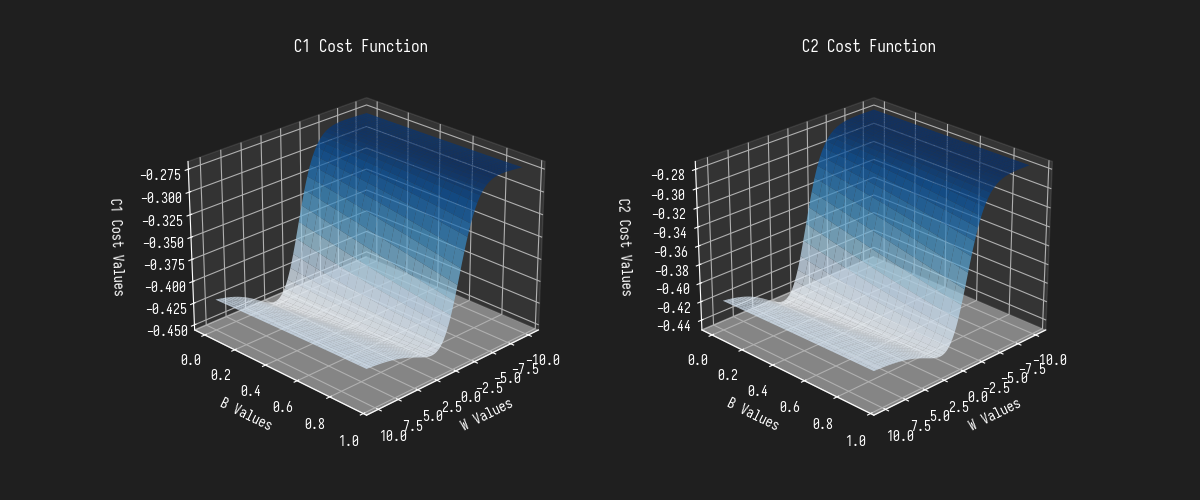

In [8]:
%config InlineBackend.print_figure_kwargs = {"bbox_inches": None}

import scipy.special

def compute_cost(X, Y, W, B):
    n = X.shape[0]
    g_wb = W[..., numpy.newaxis] * X + B[..., numpy.newaxis] # 这里增加了新的维度，以便进行广播计算
    sigmoid = scipy.special.expit(g_wb)
    loss = Y * numpy.log1p(sigmoid) + (1 - Y) * numpy.log1p(1 - sigmoid)
    cost = -1 / n * numpy.sum(loss, axis=-1)
    return cost

data = pandas.read_csv("./202503081558.csv")

X = (data[["C1", "C2"]] / 100).to_numpy()
Y = (data["LABEL"]).to_numpy()

W = numpy.arange(-10, 10, 0.01)
B = numpy.arange(0, 1, 0.05)
W, B = numpy.meshgrid(W, B)

Z1 = compute_cost(X[:, 0], Y, W, B)
Z2 = compute_cost(X[:, 1], Y, W, B)

figure = matplotlib.pyplot.figure(figsize=(12, 5))

axes1 = figure.add_subplot(1, 2, 1, projection="3d")
surface1 = axes1.plot_surface(W, B, Z1, cmap=matplotlib.cm.Blues, alpha=0.75)

axes1.view_init(elev=25, azim=45, roll=0)
axes1.set_title("C1 Cost Function")
axes1.set_xlabel("W Values")
axes1.set_ylabel("B Values")
axes1.set_zlabel("C1 Cost Values", labelpad=10)

axes2 = figure.add_subplot(1, 2, 2, projection="3d")
surface2 = axes2.plot_surface(W, B, Z2, cmap=matplotlib.cm.Blues, alpha=0.75)

axes2.view_init(elev=25, azim=45, roll=0)
axes2.set_title("C2 Cost Function")
axes2.set_xlabel("W Values")
axes2.set_ylabel("B Values")
axes2.set_zlabel("C2 Cost Values", labelpad=10)

matplotlib.pyplot.show()

In [9]:
import math
import scipy.special

def compute_cost(X, Y, sigmoid):
    loss = Y * numpy.log1p(sigmoid) + (1 - Y) * numpy.log1p(1 - sigmoid)
    return -numpy.sum(loss) / X.shape[0]

def compute_gradient(X, Y, sigmoid):
    dw = numpy.sum(numpy.dot(X.T, (sigmoid - Y))) / X.shape[0]
    db = numpy.sum(sigmoid - Y) / X.shape[0]
    return dw, db

def compute_gradient_descent(X, Y, alpha, iters):
    tw, tb = numpy.zeros(X.shape[1]), 0
    history = []
    for i in range(iters):
        sigmoid = scipy.special.expit(numpy.dot(X, tw) + tb)
        dw, db = compute_gradient(X, Y, sigmoid)
        tw = tw - alpha * dw
        tb = tb - alpha * db
        if i % math.ceil(iters / 20) == 0:
            cost = compute_cost(X, Y, sigmoid)
            history.append([i, cost])
            print(f"cost:{cost:8.8f}")
    return tw, tb, numpy.array(history)

In [10]:
LR = 1.0
ITERATIONS = 4000

fw, fb, history = compute_gradient_descent(X, Y, LR, ITERATIONS)

print(f"w: {fw}, b: {fb}")

cost:-0.40546511
cost:-0.53440903
cost:-0.56355272
cost:-0.57713107
cost:-0.58516862
cost:-0.59056082
cost:-0.59446469
cost:-0.59743915
cost:-0.59978987
cost:-0.60169938
cost:-0.60328400
cost:-0.60462167
cost:-0.60576680
cost:-0.60675860
cost:-0.60762612
cost:-0.60839138
cost:-0.60907139
cost:-0.60967954
cost:-0.61022651
cost:-0.61072091
w: [16.32266571 16.32266571], b: -20.11627744775412


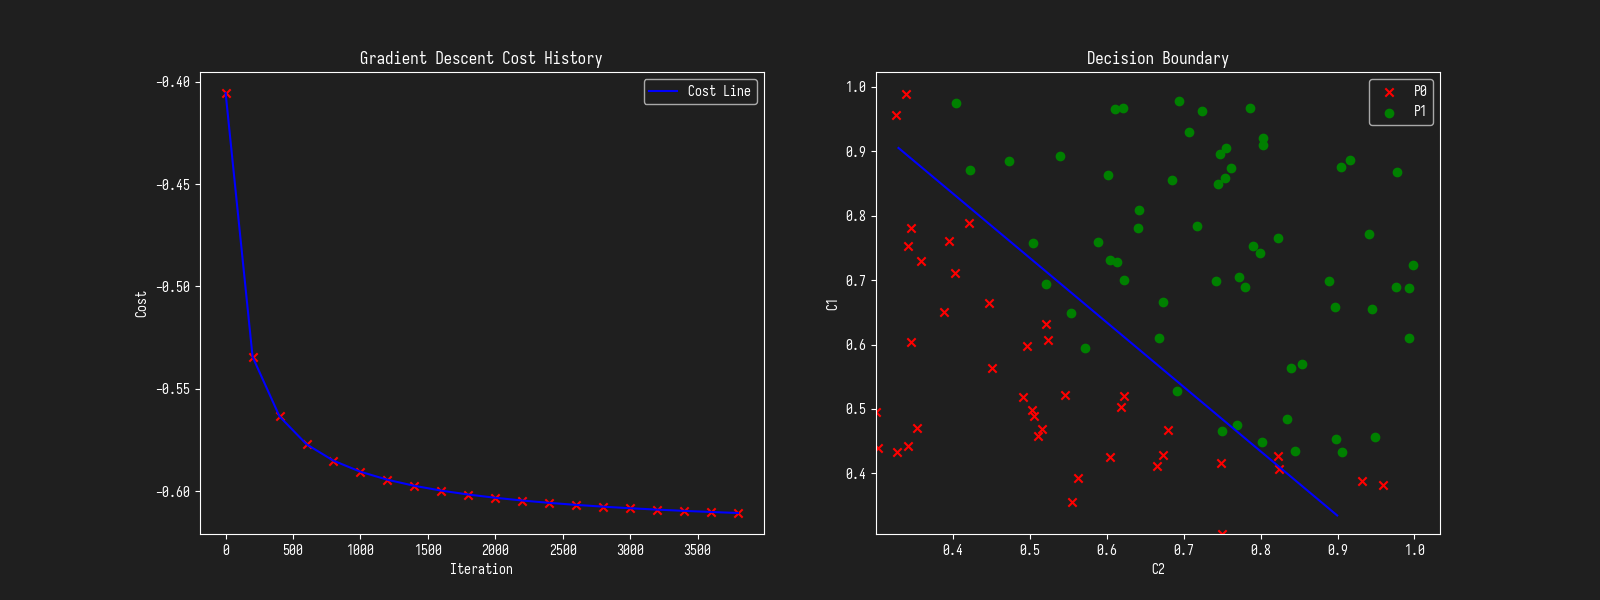

In [11]:
figure = matplotlib.pyplot.figure(figsize=(16, 6))
axes1 = figure.add_subplot(1, 2, 1)
axes1.plot(history[:, 0], history[:, 1], linestyle='-', color='b', label='Cost Line')
axes1.scatter(history[:, 0], history[:, 1], marker="x", c="r")
axes1.set_title("Gradient Descent Cost History")
axes1.set_ylabel("Cost")
axes1.set_xlabel("Iteration")
axes1.legend()

XMIN1, XMAX1 = X[:, 0].min(), X[:, 0].max()
XMIN2, XMAX2 = X[:, 1].min(), X[:, 1].max()
XX1, XX2 = numpy.meshgrid(numpy.arange(XMIN1, XMAX1, 0.1), numpy.arange(XMIN2, XMAX2, 0.1))
GRID = numpy.c_[XX1.ravel(), XX2.ravel()]
PROBS = scipy.special.expit(numpy.dot(GRID, fw) + fb).reshape(XX1.shape)

axes2 = figure.add_subplot(1, 2, 2)
axes2.scatter(X[Y == 0, 0], X[Y == 0, 1], marker="x", c="r", label="P0")
axes2.scatter(X[Y == 1, 0], X[Y == 1, 1], marker="o", c="g", label="P1")
axes2.contour(XX1, XX2, PROBS, levels=[0.5], colors="b")
axes2.set_title("Decision Boundary")
axes2.set_ylabel("C1")
axes2.set_xlabel("C2")
axes2.legend()

matplotlib.pyplot.show()

In [12]:
features = [50.534788289883 / 100, 48.85581152764205 / 100]
label = scipy.special.expit(numpy.dot(features, fw) + fb)
print(f"Logistic for {features[0]} C1 and {features[1]} C2 is Label: {label}")

Logistic for 0.5053478828988299 C1 and 0.48855811527642046 C2 is Label: 0.019975283743304983
